- https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f
- https://readthedocs.org/projects/pygam/downloads/pdf/latest/
- https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html
- https://towardsdatascience.com/generalised-additive-models-6dfbedf1350a


In [1]:
!pip install pygam

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = pd.read_excel("default_of_credit_card_clients.xls")
dataset.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [6]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
from pygam import LogisticGAM

X = dataset[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = dataset.target

#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)

In [13]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    150.2784
Link Function:                        LogitLink Log Likelihood:                                 -12818.774
Number of Samples:                        30000 AIC:                                            25938.1049
                                                AICc:                                           25939.6485
                                                UBRE:                                               2.8686
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1914
Feature Function                  Lam

In [11]:
gam.accuracy(X, y)

0.8219333333333333

## Partial Dependence Functions
One of the most attractive properties of GAMs is that we can decompose and inspect the contribution of each feature
to the overall prediction.
This is done via partial dependence functions.
Let’s plot the partial dependence for each term in our model, along with a 95% confidence interval for the estimated
function.

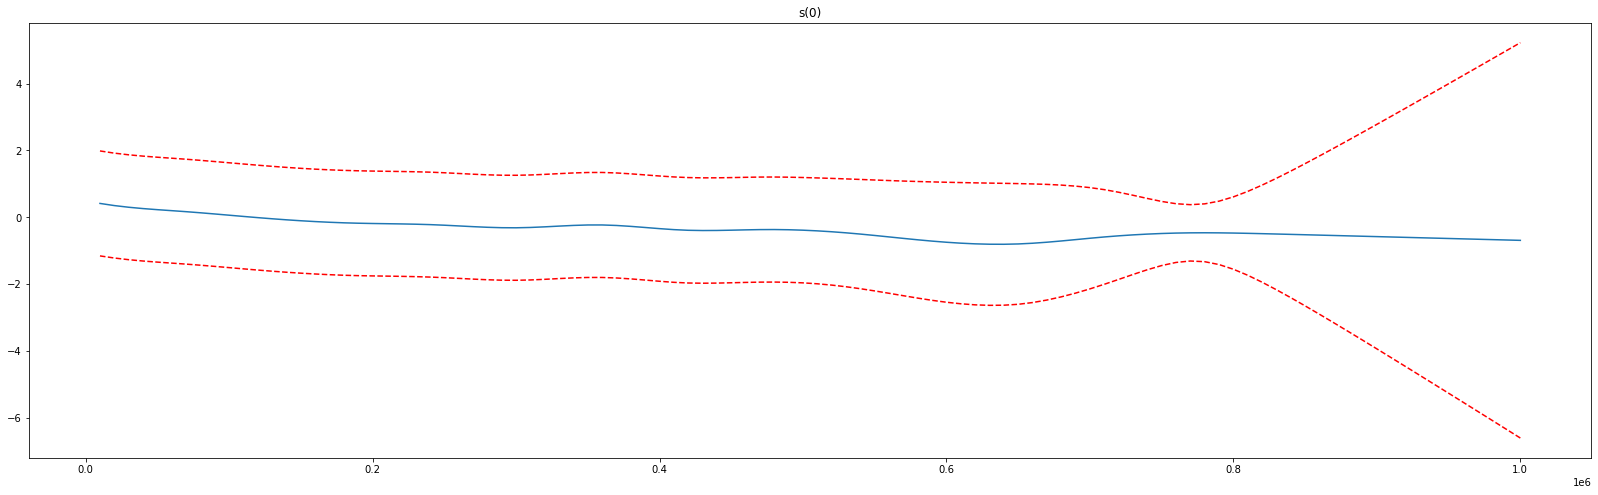

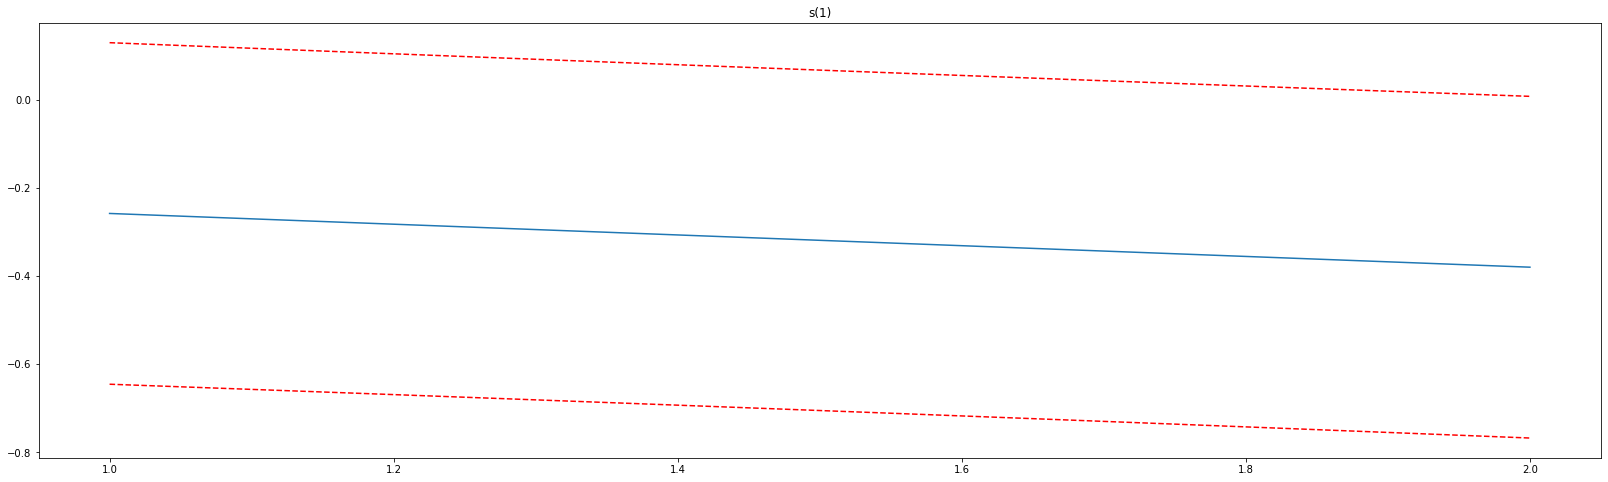

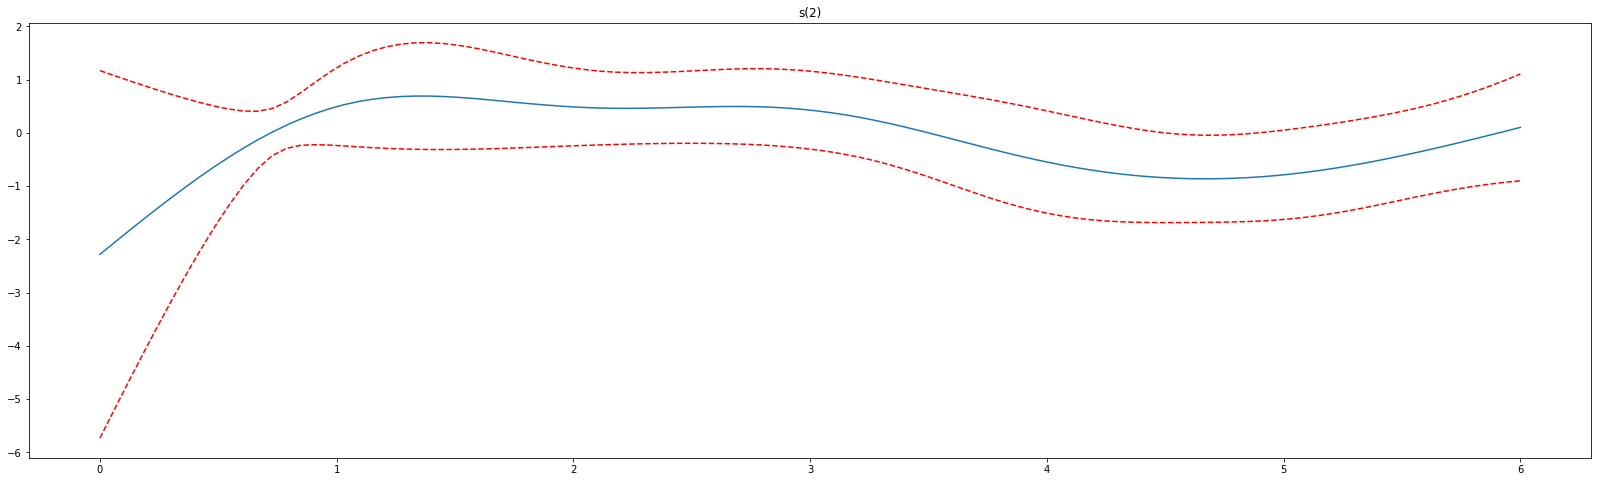

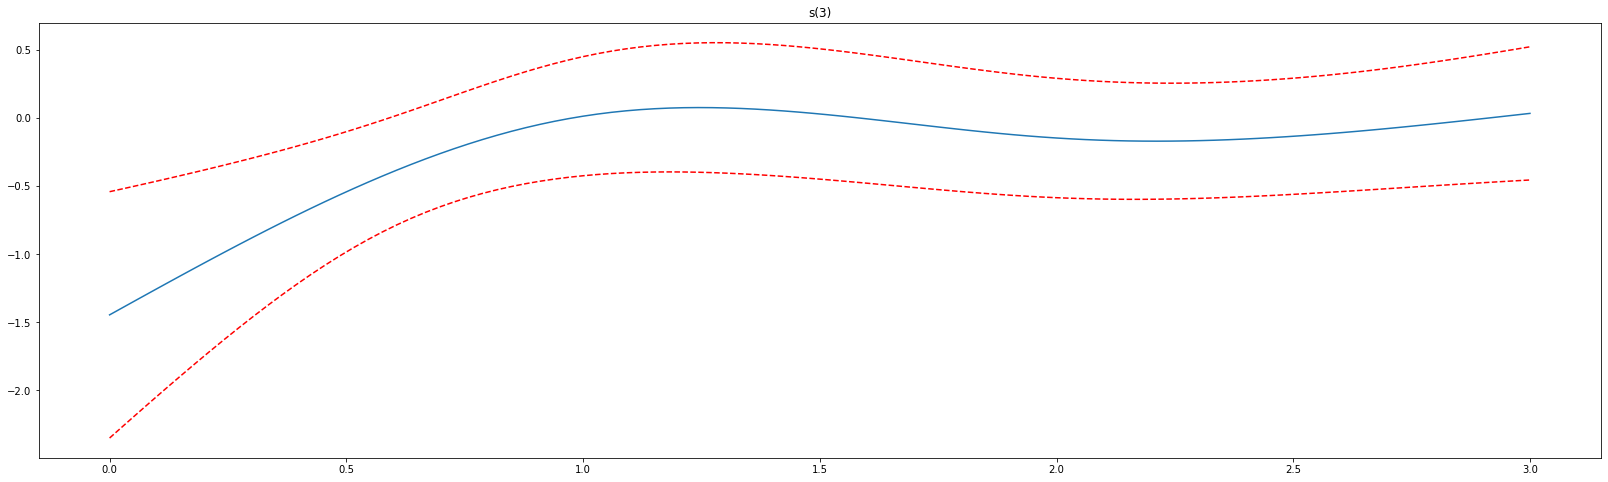

In [31]:
for i, term in enumerate(gam.terms[:4]):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()


Main parameters to keep in mind are:

n_splines , lam , and constraints

n_splines refers to the number of splines to use in each of the smooth function that is going to be fitted.

lam is the penalization term that is multiplied to the second derivative in the overall objective function.

constraints is a list of constraints that allows the user to specify whether a function should have a monotonically constraint. This needs to be a string in [‘convex’, ‘concave’, ‘monotonic_inc’, ‘monotonic_dec’,’circular’, ‘none’]

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
gam = LogisticGAM().fit(X_train, y_train)

predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

Accuracy: 0.8207070707070707 
Log Loss: 0.43214694487626804 


In [59]:
lambda_ = [0.3] * 23
n_splines = [4, 14, 4, 6, 12, 12,4, 14, 4, 6, 12, 12,4, 14, 4, 6, 12, 12,4, 14, 4, 6, 12] 
constraints = [None] * 23

gam = LogisticGAM(constraints=constraints, 
                  lam=lambda_,
                 n_splines=n_splines).fit(X_train, y_train)
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

Accuracy: 0.8209090909090909 
Log Loss: 0.43185543118605174 
